In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


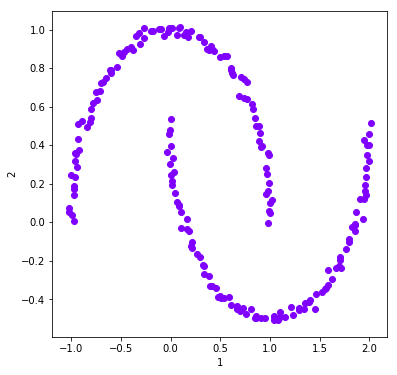

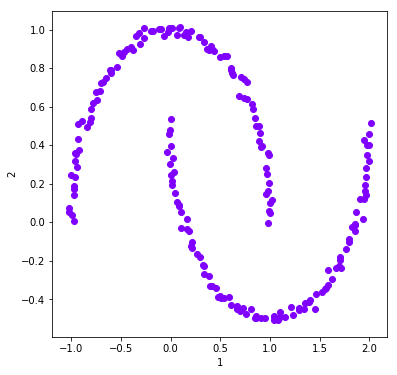

In [7]:
n_samples = 200
X, y= datasets.make_moons(n_samples=n_samples, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(X)
# print(df)
dataObj = oe.data(df, [1,2])
dataObj.plot_data('parent')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


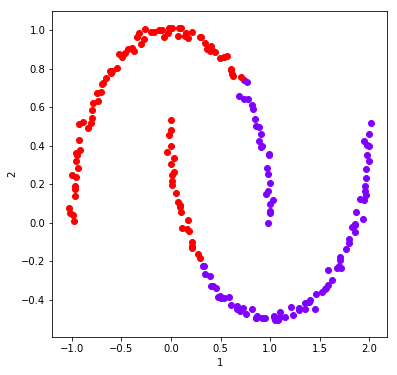

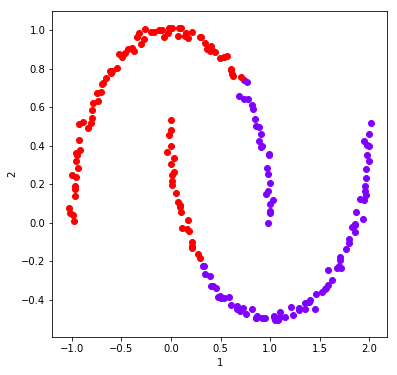

In [8]:
#Plot a single solution
# default Scikit-learn settings have built in some determinism using Ana Fred's principals, so we have to override those

c = oe.cluster(dataObj)
K = 2
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
dataObj.plot_data('parent', class_labels=c.labels['kmeans'])


In [9]:
# Build towards a majority voting that finds the two continuous partitions
c = oe.cluster(dataObj)
K = 10
numIterations = 40
c_MV_arr = []
fig_arr = []
modulo = 1 #if you want to calculate majority vote only ever other or few solutions, increase this number
sil_arr = []
det_arr = []
num_clusters = []

for i in range(1,numIterations):
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
    if not i % modulo:
        x = c.finish_majority_vote(threshold=0.5)
        c_MV_arr.append(x)
        num_clusters.append(len(x.clusterNumbers['majority_vote']))
        v = oe.validation(dataObj, x)

        #A compactness metric
        validation_name = 'silhouette'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        sil_arr.append(v.validation[name])

        #A metric for connectedness
        validation_name = 'det_ratio'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        det_arr.append(v.validation[name])

#        fig_arr.append(dataObj.plot_data('parent', class_labels=c_MV_arr[-1].labels['majority_vote']))
    #add the calculation of two metrics using the solution -- one that awards contiguousness and one that awards compactness


/anaconda3/lib/python3.6/site-packages/openensembles/finishing.py:360: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.co_matrix.as_matrix()
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


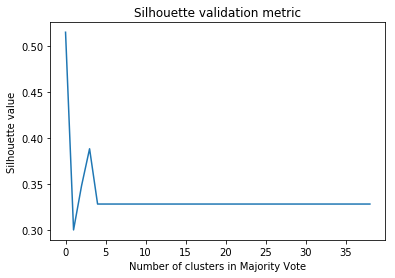

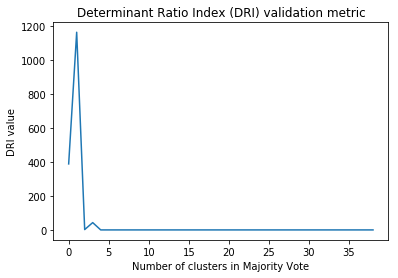

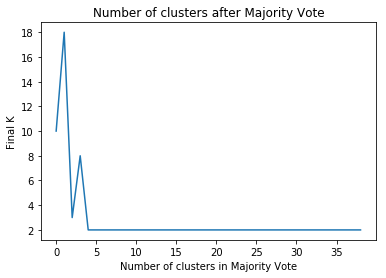

In [10]:
#Compactness
plt.plot(sil_arr)
plt.title('Silhouette validation metric')
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('Silhouette value')
plt.show()

#Connectedness
plt.plot(det_arr)
plt.title('Determinant Ratio Index (DRI) validation metric')
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('DRI value')
plt.show()

#Convergence towards final K
plt.plot(num_clusters)
plt.xlabel('Number of clusters in Majority Vote')
plt.ylabel('Final K')
plt.title('Number of clusters after Majority Vote')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


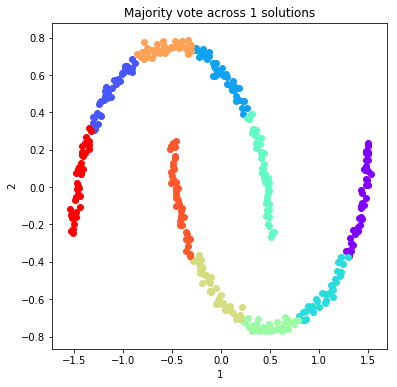

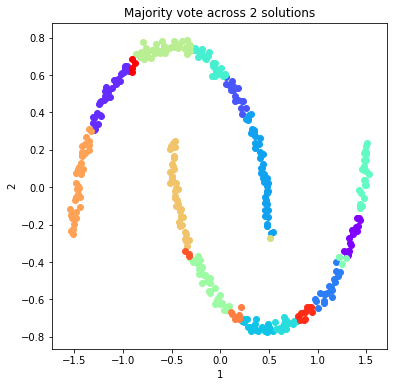

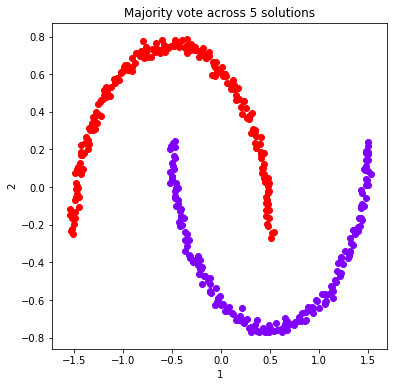

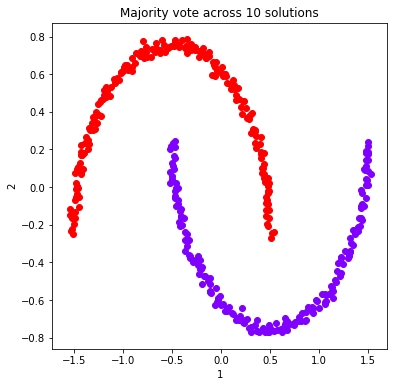

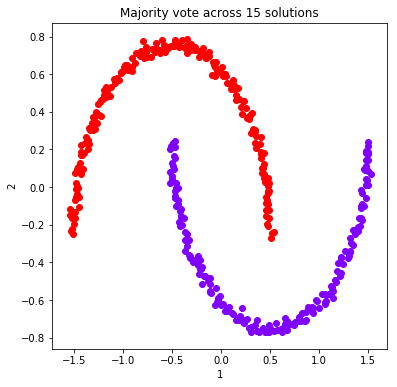

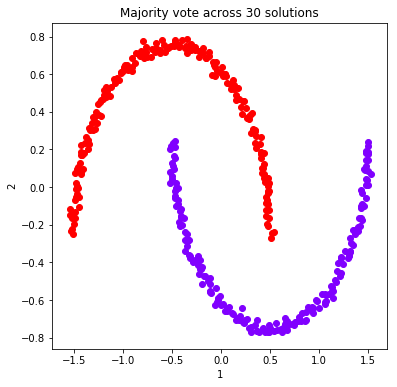

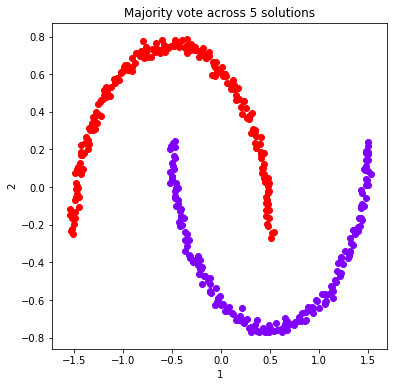

In [46]:
# Plot some span of solutoins, including the one that minimizes connectedness
import operator
idx, value = min(enumerate(det_arr), key=operator.itemgetter(1)) #Where the connectedness metric minimized

toPlot = [0, 1, 4, 9, 14, 29, idx]
for ind in toPlot:

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    plt.title('Majority vote across %d solutions'%(ind+1))
    plt.show()
